In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the cast dataset
cast = pd.read_csv('cast.csv')

In [11]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

character_counts = superman_batman_characters.groupby(['year', 'character']).size().unstack(fill_value=0)
superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]
num_superman_years = len(superman_years)
print("Number of Superman Years:", num_superman_years)

Number of Superman Years: 11


In [4]:
superman_batman_characters = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

character_counts = superman_batman_characters.groupby(['year', 'character']).size().unstack(fill_value=0)
batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]
num_batman_years = len(batman_years)
print("Number of Batman Years:", num_batman_years)

Number of Batman Years: 27


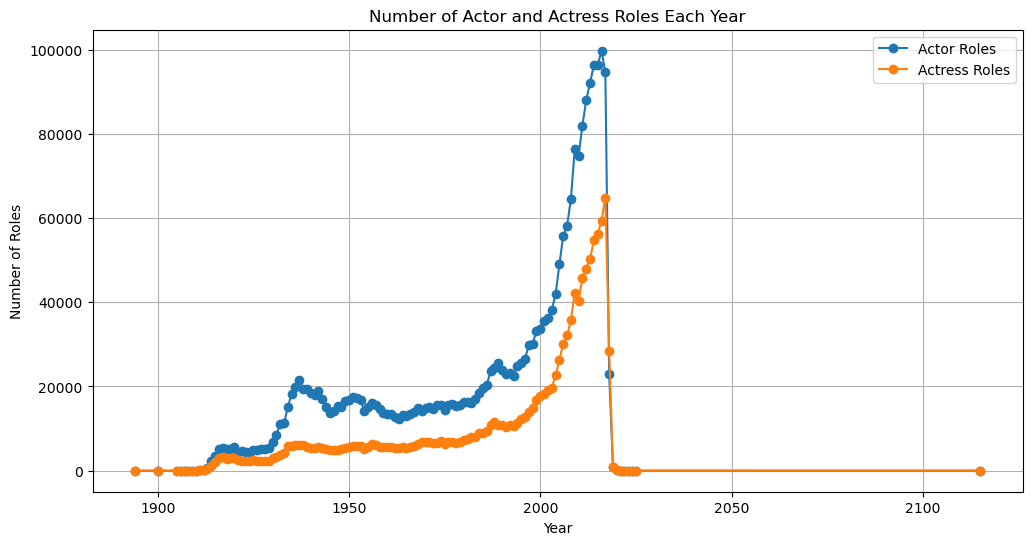

In [6]:
roles_per_year = cast.groupby(['year', 'type'])['type'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(roles_per_year.index, roles_per_year['actor'], label='Actor Roles', marker='o')
plt.plot(roles_per_year.index, roles_per_year['actress'], label='Actress Roles', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)

plt.show()

<Figure size 1200x600 with 0 Axes>

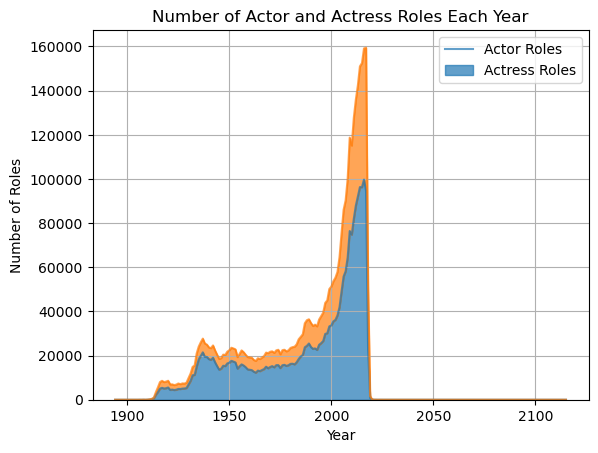

In [7]:
roles_per_year = cast.groupby(['year', 'type'])['type'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
roles_per_year.plot(kind='area', stacked=True, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend(['Actor Roles', 'Actress Roles'])
plt.grid(True)

plt.show()

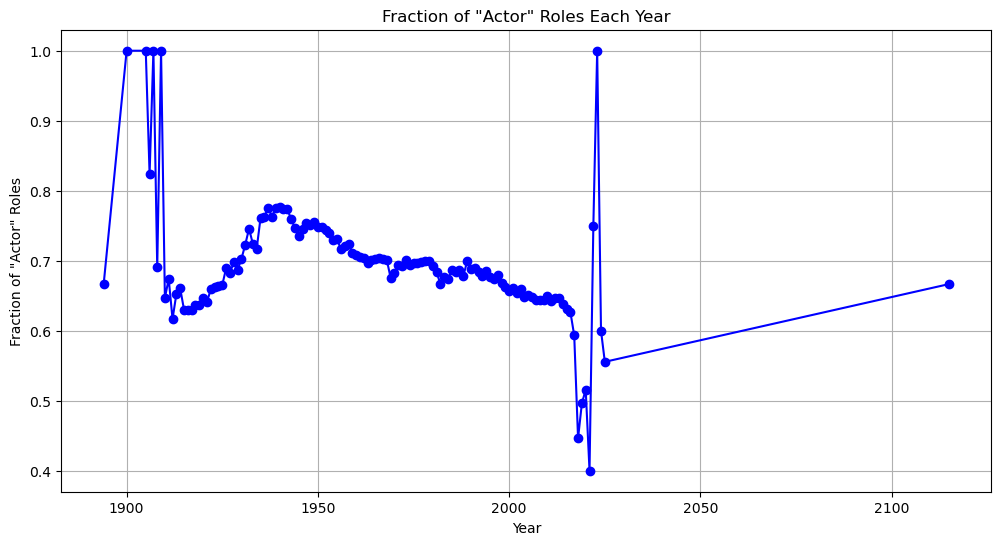

In [8]:
roles_per_year = cast.groupby(['year', 'type'])['type'].count().unstack(fill_value=0)

total_roles_per_year = roles_per_year['actor'] + roles_per_year['actress']
fraction_actor_roles = roles_per_year['actor'] / total_roles_per_year

plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.title('Fraction of "Actor" Roles Each Year')
plt.grid(True)

plt.show()

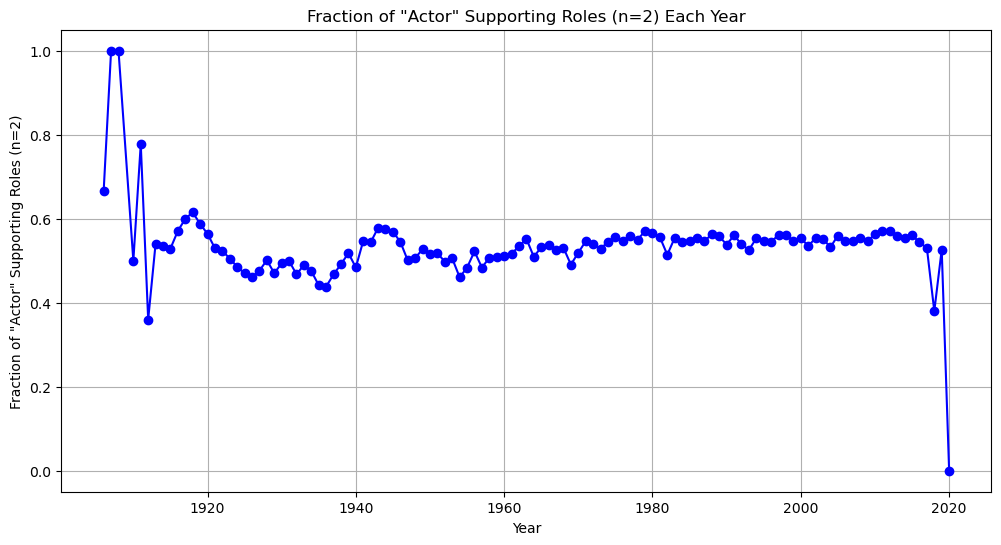

In [9]:
supporting_roles = cast[cast['n'] == 2]

supporting_roles_per_year = supporting_roles.groupby(['year', 'type'])['type'].count().unstack(fill_value=0)

total_supporting_roles_per_year = supporting_roles_per_year['actor'] + supporting_roles_per_year['actress']
fraction_actor_supporting_roles = supporting_roles_per_year['actor'] / total_supporting_roles_per_year

plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_supporting_roles.index, fraction_actor_supporting_roles, marker='o', color='b')

plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Supporting Roles (n=2)')
plt.title('Fraction of "Actor" Supporting Roles (n=2) Each Year')
plt.grid(True)

plt.show()

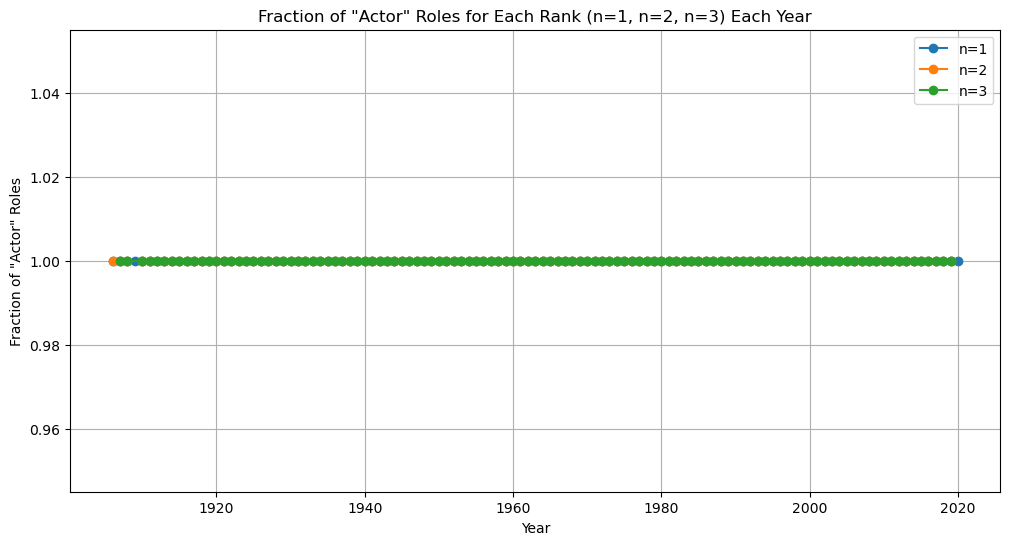

In [10]:
rank_roles = cast[cast['n'].isin([1, 2, 3])]

roles_per_year_rank = rank_roles.groupby(['year', 'n', 'type'])['type'].count().unstack(fill_value=0)

total_roles_per_year_rank = roles_per_year_rank.groupby(level=['year', 'n']).sum()
fraction_actor_roles_rank = roles_per_year_rank['actor'] / total_roles_per_year_rank['actor']

plt.figure(figsize=(12, 6))

for n in [1, 2, 3]:
    fraction_rank_n = fraction_actor_roles_rank.loc[:, n]
    plt.plot(fraction_rank_n.index, fraction_rank_n, marker='o', label=f'n={n}')

plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.title('Fraction of "Actor" Roles for Each Rank (n=1, n=2, n=3) Each Year')
plt.legend()
plt.grid(True)

plt.show()

In [16]:
release_dates = pd.read_csv('release_dates.csv')
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


C:\Users\USER\AppData\Local\Temp\ipykernel_13144\3622260939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_movies_usa['release_month'] = pd.to_datetime(christmas_movies_usa['date']).dt.month


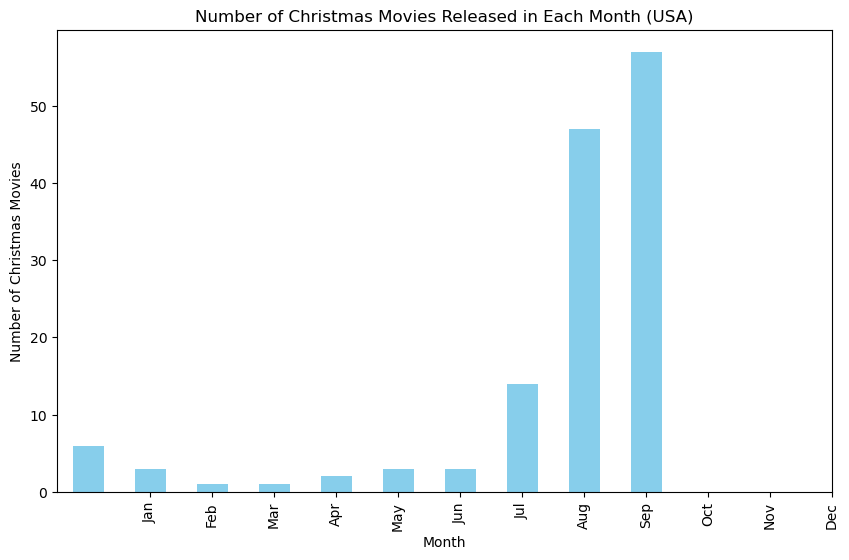

In [17]:
christmas_movies_usa = release_dates[(release_dates['title'].str.contains('Christmas', case=False, regex=False)) & (release_dates['country'] == 'USA')]
christmas_movies_usa['release_month'] = pd.to_datetime(christmas_movies_usa['date']).dt.month
month_counts = christmas_movies_usa['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Month')
plt.ylabel('Number of Christmas Movies')
plt.title('Number of Christmas Movies Released in Each Month (USA)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()